In [80]:
# SRGAN 가상환경으로

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy, mean_squared_error
from tensorflow.keras.preprocessing import *
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.ops import math_ops
from tensorflow.python.keras import backend as K
from tensorflow.python.framework import ops
from tensorflow.python.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from preprocess import *
from main import *
from loss_function import *

import cv2
import os
from glob import glob
import random


In [81]:
ground_truth = plt.imread("./test_image/butterfly.png")
ground_truth = np.asarray(ground_truth)

In [82]:
ground_truth = ground_truth[:,:,:3]
ground_truth.shape

(256, 256, 3)

In [83]:
model = tf.keras.models.load_model('./checkpoint/FSRCNN_epoch500_adam.h5')

In [84]:
def img_result(ground_truth):
    # Resize ground_truth image to half using bicubic interpolation
    h, w, _ = ground_truth.shape
    img1 = cv2.resize(ground_truth, (w // 2, h // 2), interpolation=cv2.INTER_CUBIC)
    img1 = np.asarray(img1)
    
    # Prepare input for FSRCNN
    testimg = np.asarray([img1])  # Convert to array and add batch dimension

    # Super-resolution using FSRCNN
    fsrcnn = model.predict(testimg)[0]

    # Resize bicubic image to original size for comparison
    bic = cv2.resize(img1, (w, h), interpolation=cv2.INTER_CUBIC)

    # Crop ground truth to match FSRCNN output size
    ground_truth_crop = ground_truth[:fsrcnn.shape[0], :fsrcnn.shape[1], :]

    return bic, fsrcnn, ground_truth_crop

bic, fsrcnn, ground_truth_crop = img_result(ground_truth)

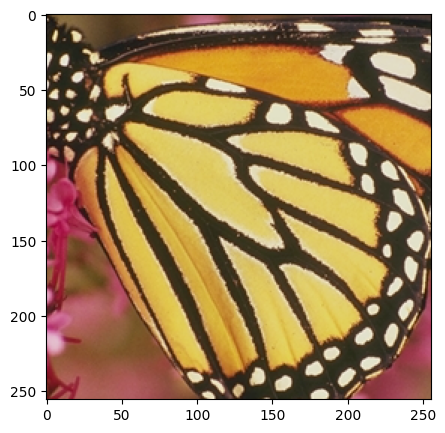

In [85]:
plt.figure(figsize=(5,5))
plt.imshow(ground_truth)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


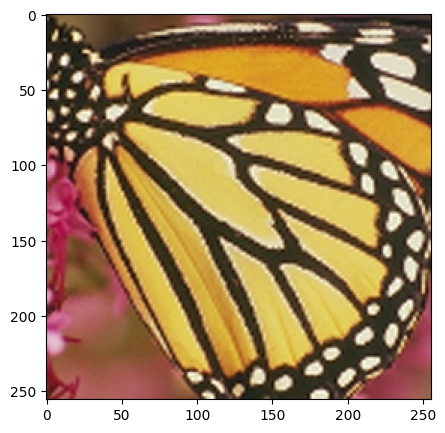

In [86]:
plt.figure(figsize=(5,5))
plt.imshow(bic)

In [87]:
bic2 = np.clip(bic,a_min=0,a_max=1)
# plt.imsave('bic_butterfly.png',bic2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


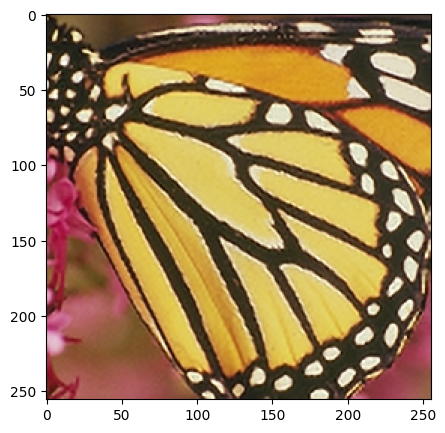

In [88]:
plt.figure(figsize=(5,5))
plt.imshow(fsrcnn)

In [89]:
fsrcnn2 = np.clip(fsrcnn,a_min=0,a_max=1)
# plt.imsave('fsrcnn_cactus.png',fsrcnn2)
# plt.imsave('fsrcnn_butterfly4.png',fsrcnn2)

In [90]:
print(ground_truth.shape)
print(bic2.shape)
print(fsrcnn2.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [91]:
PSNR(ground_truth,bic2)

26.99080467224121

In [92]:
PSNR(ground_truth,fsrcnn2)

# 35.21 2
# 35.02 3

# 27.61 2
# 27.43 3
# 24.98 original

27.608401775360107

In [93]:
SSIM = tf.image.ssim(ground_truth,bic,max_val=1.0,filter_size=11,filter_sigma=1.5,k1=0.01,k2=0.03)
print(SSIM)

tf.Tensor(0.91356367, shape=(), dtype=float32)


In [94]:
SSIM = tf.image.ssim(ground_truth,fsrcnn,max_val=1.0,filter_size=11,filter_sigma=1.5,k1=0.01,k2=0.03)
print(SSIM)

tf.Tensor(0.9251587, shape=(), dtype=float32)
